# Accessing texts from NB digital

Texts are accessed and analysed using tools built in the programming language Python. The problem is how to analyse texts when they are protected from distribution. One solution is to not challenge the copyright. Instead features of texts can be downloaded and used for analysis.

In [2]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
%matplotlib inline
mu.css()

In [3]:
mu.update('collocations', silent=True)
import collocations as col
import pandas as pd

In [4]:
mu.code_toggle()

# Aggregations

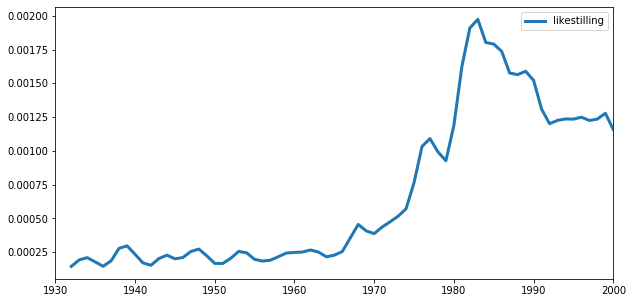

In [100]:
nb.nb_ngram('likestilling', years=(1930, 2000), corpus='bok').plot(figsize=(10,5), lw=3);

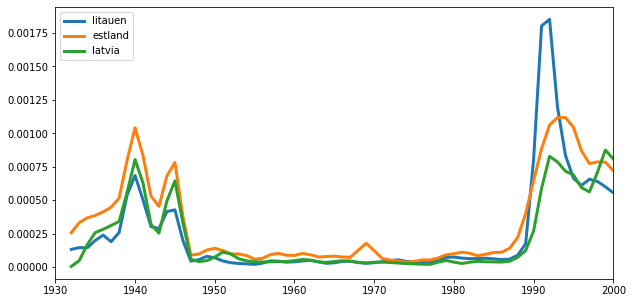

In [30]:
nb.nb_ngram('litauen, estland, latvia', years=(1930, 2000), corpus='avis').plot(figsize=(10,5), lw=3);

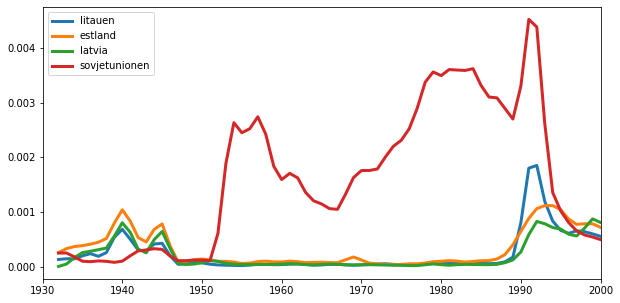

In [31]:
nb.nb_ngram('litauen, estland, latvia, sovjetunionen', years=(1930, 2000), corpus='avis').plot(figsize=(10,5), lw=3);

In [ ]:
nb

In [92]:
x = nb.nb_ngram('litauen, estland, latvia', years=(1930, 2000), corpus='avis').to_csv()

# Difference between a graph and other ways of presenting the information

In [95]:
x[:900]

',litauen,estland,latvia\r\n1930,,,\r\n1931,,,\r\n1932,0.00013348092515544946,0.00025763771911450044,6.071674204143074e-06\r\n1933,0.0001464771838395518,0.00033267616694326575,4.955197421737297e-05\r\n1934,0.00014505939217134074,0.0003691038249804526,0.00016785304099528636\r\n1935,0.00019969334474707467,0.00038605983976349145,0.00025880405118671677\r\n1936,0.00023976530256728375,0.00041341722133166303,0.00028338112701332307\r\n1937,0.00019120416167569043,0.00044808281200657053,0.0003120101238884434\r\n1938,0.0002587371239317956,0.0005167679548743282,0.00034161568752816756\r\n1939,0.0005379877362737073,0.00079745817143761,0.000558980140521232\r\n1940,0.0006848145835746216,0.0010414828179295236,0.0008041440915894006\r\n1941,0.0005023141171021267,0.0008328799043611433,0.0006278629370694988\r\n1942,0.0003035663611453086,0.0005318130414047905,0.0003200718816553227\r\n1943,0.0002890148607496787,0.0004540136187814477,0.000'

In [98]:
nb.nb_ngram('litauen, estland, latvia', years=(1930, 2000), corpus='avis')[10:20]

,litauen,estland,latvia
1940,0.000685,0.001041,0.000804
1941,0.000502,0.000833,0.000628
1942,0.000304,0.000532,0.000320
1943,0.000289,0.000454,0.000255
1944,0.000416,0.000683,0.000495
1945,0.000429,0.000782,0.000645
1946,0.000201,0.000380,0.000334
1947,0.000046,0.000090,0.000060
1948,0.000056,0.000098,0.000042
1949,0.000082,0.000129,0.000049


# Word groupings

In [43]:
gm = nb.make_graph('is');

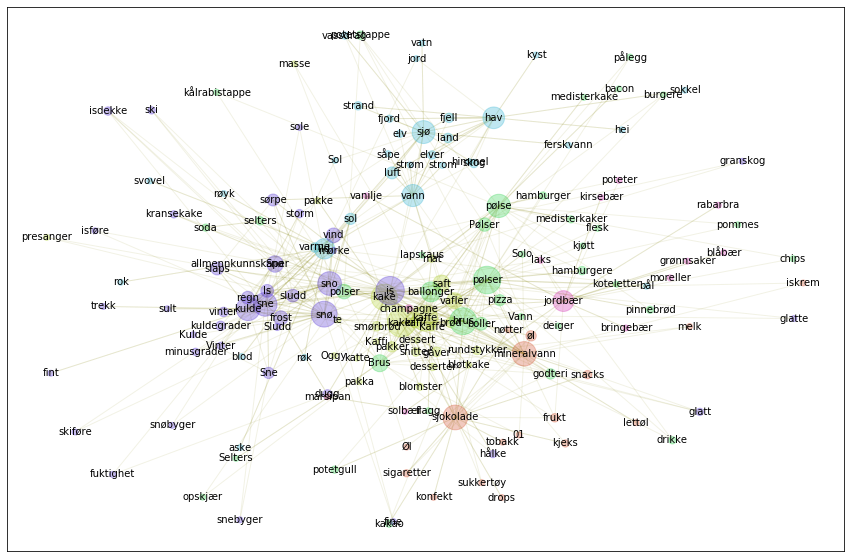

In [45]:
gnl.show_graph(gm, spread=1.2);

### Extract groupings

In [46]:
gnl.show_communities(gm)

kaker-kake :  kaker, kake, kaffe, vafler, brød, kaffi, pakker, gåver, smørbrød, Kaffe, rundstykker, snitter, mat, desserter, blomster, pakka, presanger, bløtkake, masse, Oggy, dessert, te, pakke, katte, Kaffi

pølser-brus :  pølser, brus, pølse, ballonger, saft, Brus, polser, Pølser, boller, pizza, godteri, selters, potetstappe, hamburgere, pinnebrød, potetgull, drikke, kakao, soda, hamburger, medisterkaker, medisterkake, flesk, kjøtt, opskjær, flagg, pommes, Solo, burgere, Vann, kålrabistappe, koteletter, chips, Selters, pålegg, lapskaus, deiger, bacon

sjø-vann :  sjø, vann, hav, ild, luft, sol, land, fjell, varme, skog, strand, elver, fjord, vassdrag, elv, bål, blod, strom, strøm, såpe, røk, kyst, aske, rok, sokkel, himmel, røyk, svovel, ferskvann, hei, vatn, Sol, jord

is-snø :  is, snø, sno, kulde, sne, Snø, vind, frost, slaps, Is, regn, sludd, sørpe, Sne, kuldegrader, dugg, vinter, isdekke, storm, Vinter, Sludd, hålke, glatt, kransekake, minusgrader, ski, fint, trekk, sole, glatt

# Similarities

In [47]:
nb.relaterte_ord('is')

['brus',
 'kaker',
 'is',
 'kaffe',
 'kake',
 'sjokolade',
 'pølser',
 'mineralvann',
 'ballonger',
 'pølse',
 'saft',
 'vafler',
 'boller',
 'godteri',
 'kaffi',
 'brød',
 'pakker',
 'sno',
 'kulde',
 'vann']

# Find texts and search in them

Use properties of texts to constrain number of possibilities. Retrieve a selection of books that satisfies those contrainst. This is your corpus. The command is `book_corpus()`, which takes a number of parameters. Corpora can be joined, subtracted and combined in a number of ways. 

An output from a search `nb.book_corpus(author='Røssaak%Eivin%')`

In [5]:
corpus = nb.book_corpus(author='Røssaak%Eivin%')
corpus

,urn,author,title,year
0,2011032206046,"Røssaak, Eivind",(Sic),2001
1,2014072405078,"Røssaak, Eivind",Selviakttakelse,2005
2,2008061800060,"Røssaak, Eivind","Skrujern, kanoner og trojanske hester",1996
3,2008081400081,"Røssaak, Eivind",Det postmoderne og de intellektuelle,1998


This corpus can be searched, for example with the command 

`nb.urn_concordance(word=['postmodernisme', 'postmodernismen'], urns=corpus, before=10, after=10)`

In [6]:
nb.urn_concordance(word=['postmodernisme', 'postmodernismen'], urns=corpus, before=10, after=10)

"(Sic), Røssaak, Eivind, 2001","arbeidsdeling mellom litteraturviter og forfatter , kan man si at",postmodernismen,"tilsvarer et sammenbrudd i arbeidsfordelingen , litteraturviteren er blitt forfatter"
"(Sic), Røssaak, Eivind, 2001",å forstå hvis den sees i lys av modernismen og,postmodernismen,i kunstartene . Det handler om « representasjon » -
"Selviakttakelse, Røssaak, Eivind, 2005","- tallet for det svenske tidsskriftet Kris , som introduserte",postmodernisme,"og avansert dekonstruksjonsteori , blant annet gjennom oppsiktsvekkende lesninger av"
"Selviakttakelse, Røssaak, Eivind, 2005",og dekonstruksjonen . For en mer omfattende diskusjon av termen,postmodernisme,kan man oppsøke bøker av bl.a. Scott Lash ( Sociology
"Selviakttakelse, Røssaak, Eivind, 2005",er en av de mest fruktbare og påtakelige konsekvensene av,postmodernismen,. Kunsten har inkorporert ikke-kunst på en måte som ble
"Selviakttakelse, Røssaak, Eivind, 2005",reist en advarende pekefinger mot det de kaller tendenser i,postmodernismen,. De tenker særlig på det de kaller en farlig
"Selviakttakelse, Røssaak, Eivind, 2005","kategoriar , noko som er karakteristisk for ein variant av",postmodernismen,.
"Skrujern, kanoner og trojanske hester, Røssaak, Eivind, 1996",en flora ny-ismer og post-ismer : modernisme er blitt til,postmodernisme,", strukturalisme til poststrukturalisme , pragmatisme til nypragmatisme , og"
"Det postmoderne og de intellektuelle, Røssaak, Eivind, 1998",et essay av Derrida som skyteskive og bevis for at,postmodernisme,og dekonstruksjon er galskap . I en nærlesning av det
"Det postmoderne og de intellektuelle, Røssaak, Eivind, 1998","distinksjoner : « postmodernitet » brukes om en samfunnstilstand, «",postmodernisme,"» om spesielle retninger innen kunst , litteratur , arkitektur"
"Det postmoderne og de intellektuelle, Røssaak, Eivind, 1998",« post war » litteratur i negativ forstand som «,postmodernisme,» . 6 De sammenligner det nye med sin egen


What is connected with the term *postmodern* in the digital collection? Let us start with a larger corpus, one that contains one version of the word or the other

In [7]:
capitalize = lambda words: [x.capitalize() for x in words]

In [8]:
postmodern_words = "postmodernisme postmodernismen postmoderne".split()
postmodern_words += capitalize(postmodern_words)
postmodern_words

['postmodernisme',
 'postmodernismen',
 'postmoderne',
 'Postmodernisme',
 'Postmodernismen',
 'Postmoderne']

In [9]:
postmodern = nb.book_corpus(words= postmodern_words, limit = 20000)


In [10]:
mu.printmd('Number of books satisfying the postmodern condition: ' + "**" + str(len(postmodern))+ "**.")
postmodern.head()

Number of books satisfying the postmodern condition: **8906**.

,urn,author,title,year
0,2011062706136,"Vetlesen, Arne Johan",Moralens sjanser i markedets tidsalder,2003
1,2014061308020,,Universitetet i Oslo 1811-2011,2011
2,2012122005093,,Samisk selvbestemmelse,2008
3,2011080306011,,Kyststien - tre perspektiver,2004
4,2010042806052,"Kjørup, Søren",Forskning og samfund,1997


In [11]:
speedkonk = lambda søkeord, input_korpus, before=10, after=10: nb.urn_concordance(word=søkeord, urns=nb.refine_book_urn(urns=nb.pure_urn(input_korpus), words=søkeord, limit=10), after=after, before=before,)

In [12]:
speedkonk('litteratur', postmodern)

"Tankens forræderi, Finkielkraut, Alain, 1994",Vi beveger oss i retning av en periode med universell,litteratur,", og hver enkelt må gå inn for å fremskynde"
"Tankens forræderi, Finkielkraut, Alain, 1994",stor henrykkelse oppdaget eksistensen av en særegent tysk kunst og,litteratur,". Da befant han seg i Strasbourg , hvor to"
"Tankens forræderi, Finkielkraut, Alain, 1994",i verden - enten de er utstyrt med stempelet «,litteratur,» eller ikke viser til ett eneste enhets- og regelsystem
"Tankens forræderi, Finkielkraut, Alain, 1994",dokument er det slutt på Goethes drøm om en universell,litteratur,.
"Tankens forræderi, Finkielkraut, Alain, 1994",uheldig å være født i et land med en stor,litteratur,", må skrive på sitt eget sprog slik en tsjekkisk"
"Nordnorsk utsyn, , 2000",hadde effektiv tilknytning overalt . Følgelig kunne de hente ned,litteratur,", film og musikk , skaffe seg undervisningsprogrammer , delta"
"Nordnorsk utsyn, , 2000","musikk , teater , dans , ballett , billedkunst ,",litteratur,", video og animasjon . Her spilte det kommunale kulturengasjementet"
"Virkelig fri, Lønning, Per, 2000",i presse ? Eller om det fargerike spekteret av okkult,litteratur,som fyller meter på meter i moderne bokhandelhyller ? New
"Virkelig fri, Lønning, Per, 2000",et bibliotek - med en menneskelig tilblivelseshistorie som all annen,litteratur,. Det er derfor av betydning at dens tilblivelse klargjøres
"Lesbiske og homofile i møte med helse- og sosialtenesta, , 2006",", blei raskt tatt opp både i medisinsk og allmenn",litteratur,", noko som førte til at det blei stilt spørsmål"
"Lesbiske og homofile i møte med helse- og sosialtenesta, , 2006",utgjør ikke noe unntak her . Det hender kunst og,litteratur,"avslører våre innforståttheter , det hender det skjer uventede ting"


# Aggregate the word 'postmodernismen' in the corpus

In [13]:
pm = dict()
urnlist = nb.pure_urn(postmodern)
step = 500
for i in range(0, len(postmodern), step):
    pm[i] = nb.urn_coll('postmodernismen',urns=urnlist[i:i+step], before=10, after=10)

In [14]:
pm_tot = pd.concat([pm[i] for i in pm])

In [78]:
#pm_tot.loc['han']

In [20]:
pm_total = nb.frame(pm_tot.groupby(pm_tot.index).sum(),'freq')

In [52]:
import matplotlib.pyplot as plt

# Difference between mass

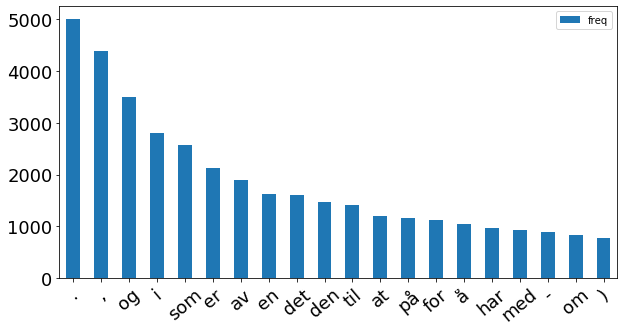

In [62]:
pm_total[['freq']].sort_values(by='freq', ascending=False)[:20].plot(kind='bar', rot=40, figsize=(10,5))
plt.tick_params(labelsize=18)

In [21]:
def velg_form(word):
    former = list({x.split()[0] for x in nb.word_form(word)})
    if 'det' in former:
        res = 'det'
    elif 'pron' in former:
        res = 'pron'
    elif 'verb' in former:
        res = 'verb'
    elif 'subst' in former:
        res = 'subst'
    elif 'adj' in former:
        res = 'adj'
    else:
        try:
            res = former[0]
        except:
            res = 'ukjent'
    return res

def klassifikasjon(df, by='score', num = 60, up=True):
    gruppering = list(map(lambda w: (w, velg_form(w)), df.sort_values(by=by, ascending=up).head(num).index))
    grupper = dict(gruppering)
    grupperinger = {cat:[w for w in grupper if grupper[w] == cat] for cat in grupper.values()}
    return nb.frame(grupperinger).transpose().fillna('')

In [24]:
tot = nb.frame(nb.totals(50000), 'tot')

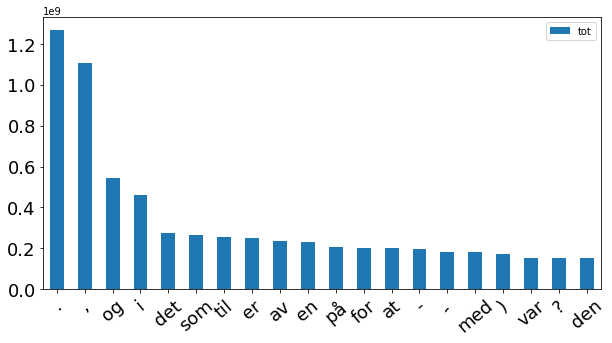

In [58]:
tot.sort_values(by='tot', ascending=False)[:20].plot(figsize=(10,5), kind='bar', rot=40)
plt.tick_params(labelsize=18)

In [25]:
pm_total['pmi'] = (pm_total['freq']**1.5/tot['tot'])

# Consider groups of associated words by category

In [70]:
classes = klassifikasjon(pm_total, by='pmi', num=120, up=False).head(30)

In [77]:
#classes

In [76]:
def select(values):
    return value

  
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '18px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '18px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]


classes.style.set_table_styles(styles)

,ukjent,subst,verb,adj,prep
0,postmoderne,arkitekturen,kjennetegner,estetiske,innenfor
1,Bjarte,arkitektur,avviser,filosofiske,hinsides
2,Samtiden,realismen,stiler,estetisk,
3,Foucault,epoker,hevder,kulturelle,
4,Habermas,sannheter,oppløse,arkitektoniske,
5,Skjervheim,kunsten,kjennetegn,moderne,
6,Nietzsche,estetikk,utfordres,universell,
7,Torben,diskurs,representerer,universelle,
8,Fredric,kritikk,kritiserer,psykoanalytisk,
9,Schultz,diskurser,trekk,kritisk,


In [72]:
pm_total['combine'] = (pm_total.pmi/pm_total.score)

In [80]:
#pm_total.sort_values(by='combine', ascending=False)

In [79]:
#klassifikasjon(pm_total, by='combine', num=120, up=False).head(30)

# Make a network of word from one book

Her we use one f Eivnd Røssaak's books.

In [82]:
graf = nb.make_network_graph(2008081400081,list(classes.subst))

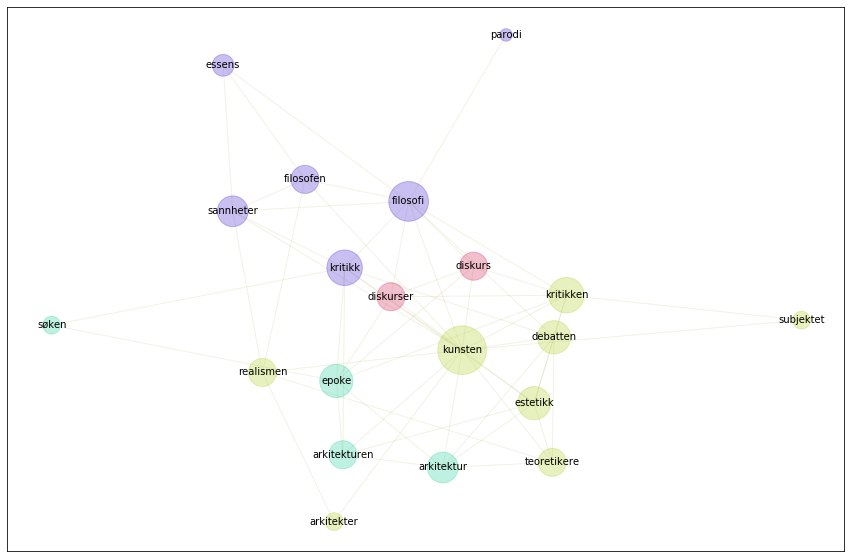

In [84]:
gnl.show_graph(graf);

In [85]:
gnl.show_communities(graf)

kunsten-kritikken :  kunsten, kritikken, debatten, estetikk, realismen, teoretikere, arkitekter, subjektet

epoke-arkitektur :  epoke, arkitektur, arkitekturen, søken

filosofi-kritikk :  filosofi, kritikk, sannheter, filosofen, essens, parodi

diskurser-diskurs :  diskurser, diskurs



*kunsten-kritikken* :  kunsten, kritikken, debatten, estetikk, realismen, teoretikere, arkitekter, subjektet

*epoke-arkitektur* :  epoke, arkitektur, arkitekturen, søken

*filosofi-kritikk* :  filosofi, kritikk, sannheter, filosofen, essens, parodi

*diskurser-diskurs* :  diskurser, diskurs
